In [21]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pandas as pd
from matplotlib import pyplot as plt

In [22]:
# prepare the data
df = pd.read_csv("../task_data.csv")
df = df.replace(',', '.', regex=True)
df = df.dropna()

In [23]:
df.head()
df.shape

(37, 14)

In [24]:
# assign X and y with proper data
X = df.drop(columns=['ID', 'Cardiomegaly'])
y = df['Cardiomegaly']

In [25]:
# preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [ ]:
# create RFC (default parameters)
rf = RandomForestClassifier()

In [27]:
# fit the data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# test predictions (75% accuracy for this run here)
y_pred = rf.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 1]


In [29]:
rf.score(X_test, y_test)

0.75

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [ ]:
# initalized parameters
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = 'entropy', 
                             min_samples_split = 5,
                             max_depth = 14, 
                             random_state = 42)

In [33]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=5,
                       n_estimators=1000, random_state=42)

In [34]:
rf2.score(X_test, y_test)

0.75

In [35]:
y_pred2 = rf2.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [37]:
import seaborn as sns

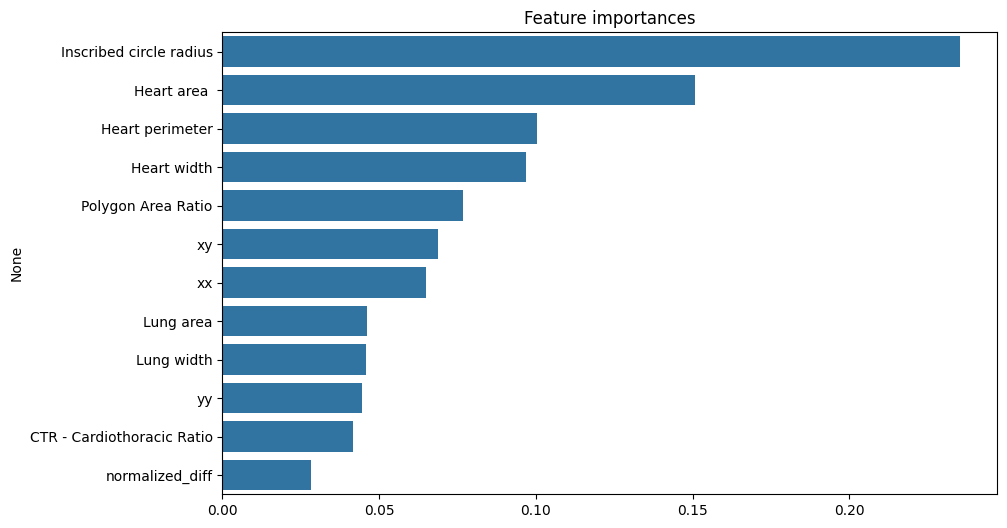

In [ ]:
# basically importance power of the feature
importances = rf2.feature_importances_ 
features = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature importances")
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"RF Test AUC: {auc:.3f}")

RF Test AUC: 0.700


RF Test AUC: 0.700


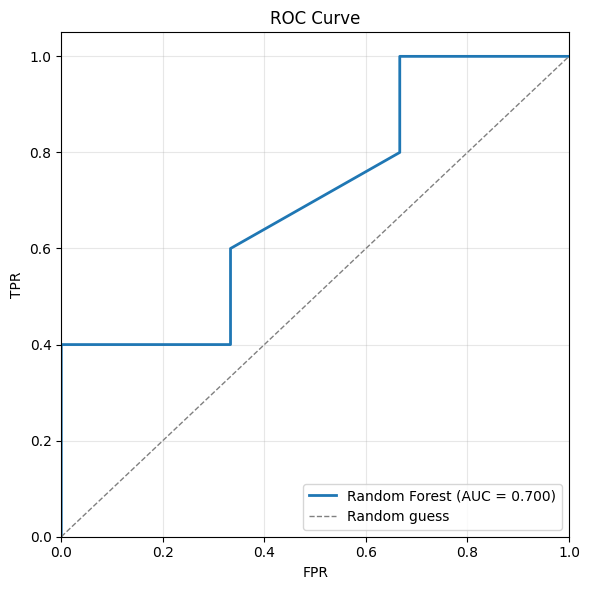

In [ ]:
from sklearn.metrics import roc_curve
y_proba = rf.predict_proba(X_test)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"RF Test AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)

# ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2,
         label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Random guess")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()